In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
horse_df = pd.read_csv('horse.csv')

In [3]:
horse_df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [5]:
horse_df.shape

(299, 28)

In [6]:
horse_df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [7]:
horse_df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [8]:
horse_df.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

Outcome is the target variable

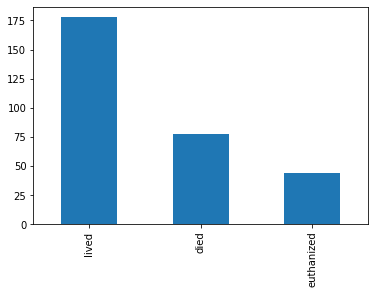

In [9]:
horse_df.outcome.value_counts().plot.bar()

In [10]:
category_variables = ['surgery', 'age', 'temp_of_extremities','peripheral_pulse', 
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 
     'abdomen','abdomo_appearance', 'surgical_lesion','cp_data'] 

    perform one hot encoding on various features in dataset

In [11]:
horse_encoded_df = pd.get_dummies(horse_df[category_variables])

In [12]:
horse_encoded_df.columns

Index(['surgery_no', 'surgery_yes', 'age_adult', 'age_young',
       'temp_of_extremities_cold', 'temp_of_extremities_cool',
       'temp_of_extremities_normal', 'temp_of_extremities_warm',
       'peripheral_pulse_absent', 'peripheral_pulse_increased',
       'peripheral_pulse_normal', 'peripheral_pulse_reduced',
       'mucous_membrane_bright_pink', 'mucous_membrane_bright_red',
       'mucous_membrane_dark_cyanotic', 'mucous_membrane_normal_pink',
       'mucous_membrane_pale_cyanotic', 'mucous_membrane_pale_pink',
       'capillary_refill_time_3', 'capillary_refill_time_less_3_sec',
       'capillary_refill_time_more_3_sec', 'pain_alert', 'pain_depressed',
       'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain',
       'peristalsis_absent', 'peristalsis_hypermotile',
       'peristalsis_hypomotile', 'peristalsis_normal',
       'abdominal_distention_moderate', 'abdominal_distention_none',
       'abdominal_distention_severe', 'abdominal_distention_slight',
       'nasogast

In [13]:
horse_encoded_df.shape

(299, 56)

In [14]:
# perform label encoding on target column
from sklearn.preprocessing import LabelEncoder

In [15]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(horse_df["outcome"])

In [18]:
horse_df["outcome"]

0            died
1      euthanized
2           lived
3            died
4            died
5           lived
6           lived
7            died
8      euthanized
9           lived
10          lived
11          lived
12          lived
13           died
14          lived
15           died
16           died
17          lived
18          lived
19          lived
20          lived
21          lived
22          lived
23          lived
24          lived
25          lived
26          lived
27          lived
28           died
29          lived
          ...    
269          died
270         lived
271         lived
272          died
273    euthanized
274          died
275    euthanized
276         lived
277         lived
278         lived
279         lived
280          died
281          died
282         lived
283         lived
284         lived
285    euthanized
286         lived
287         lived
288         lived
289         lived
290          died
291          died
292    euthanized
293       

In [19]:
y

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(horse_encoded_df, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(239, 56)
(239,)
(60, 56)
(60,)


In [37]:
#treating null values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy = ''most_frequent'')
X_train = imp.fit_transform(X_train)
X_test = imp.fit_transform(X_test)

SyntaxError: invalid syntax (<ipython-input-37-e6147dc57160>, line 3)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [40]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [41]:
y_predict = dt_model.predict(X_test)

Evaluation of classification model

In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict, y_test)
print("The prediction accuracy of Decisio tree mod on testing dta is ", accuracy)

The prediction accuracy of Decisio tree mod on testing dta is  0.5333333333333333


In [49]:
y_pred_train = dt_model.predict(X_train)
accuracy = accuracy_score(y_pred_train, y_train)
print("The prediction accuracy of Decisio tree mod on testing dta is ", accuracy)

The prediction accuracy of Decisio tree mod on testing dta is  0.9874476987447699


If u see above , it is a clear case of overfitting, so we have to prune our decisoin tree to avoid overfitting

In [54]:
dt_prune = DecisionTreeClassifier(max_depth = 4) # pruning is achieved by providing maxdepth of the tree ie howmany levels can be there
dt_prune.fit(X_train, y_train)
y_predict = dt_prune.predict(X_test)

In [55]:
accuracy = accuracy_score(y_predict, y_test)
print("The prediction accuracy of Decisio tree mod on testing dta is ", accuracy)

The prediction accuracy of Decisio tree mod on testing dta is  0.65


In [56]:
y_pred_train = dt_prune.predict(X_train)
accuracy = accuracy_score(y_pred_train, y_train)
print("The prediction accuracy of Decisio tree mod on testing dta is ", accuracy)

The prediction accuracy of Decisio tree mod on testing dta is  0.698744769874477


The overfitting is now resolved using pruning